In [0]:
!mkdir utils

In [1]:
from utils.file_utils import *
from utils.image_utils import *
from utils.generator_utils import *
from utils.tqdm_utils import *
from utils.keras_utils import *

from config import config
from model import *
import google.colab as colab

Using TensorFlow backend.


In [0]:
import os
import tensorflow as tf
from tensorflow.contrib import keras
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
L = keras.layers
K = keras.backend
import time
import zipfile
import json
from collections import defaultdict
import re
import random
from random import choice
import collections
import pickle
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import warnings
warnings.filterwarnings('ignore')

In [3]:
def mount_google_drive():
	'''
	# Functionality
		Mount google drive. Since colab does not save files, we want to make it easier to directly access files in google drive.
	# Arguments
		Nothing
	# Returns
		drive_root: the working directory mounted
	'''
	mount_directory = "/content/gdrive"
	drive = colab.drive
	drive.mount(mount_directory, force_remount=True)
	drive_root = mount_directory + "/" + list(filter(lambda x: x[0] != '.', os.listdir(mount_directory)))[0]
	return drive_root



ROOT_DIR =  mount_google_drive()
CHECKPOINT_ROOT = ROOT_DIR+ "/captioning/checkpoints/"
DATASET_DIR = ROOT_DIR + "/Dataset/"

if not os.path.exists(DATASET_DIR):
  os.makedirs(DATASET_DIR)

if not os.path.exists(CHECKPOINT_ROOT):
  os.makedirs(CHECKPOINT_ROOT)

  
def get_checkpoint_path(epoch=None):
    if epoch is None:
        return os.path.abspath(CHECKPOINT_ROOT + "weights")
    else:
        return os.path.abspath(CHECKPOINT_ROOT + "weights_{}".format(epoch))
      
# example of checkpoint dir
print(get_checkpoint_path(4))

Mounted at /content/gdrive
/content/gdrive/My Drive/captioning/checkpoints/weights_4


In [4]:
with open(DATASET_DIR + 'vocab.json', 'r') as fp:
    vocab = json.load(fp)
    
len(vocab)

6375

In [0]:
model = Model(config=config, vocab=vocab, input_data=None, pad_idx=vocab["#PAD#"], checkpoint_epoch=49)

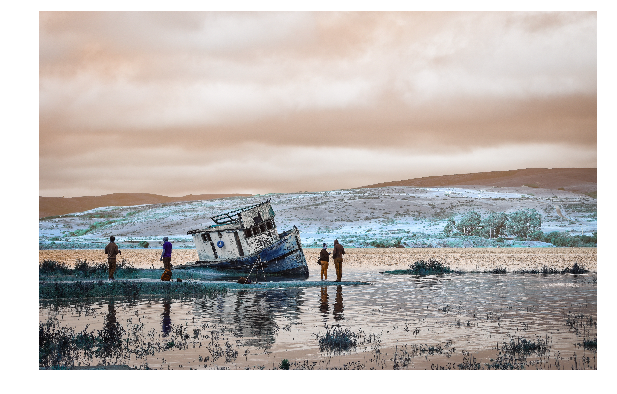

a boat is floating on the water near the shore


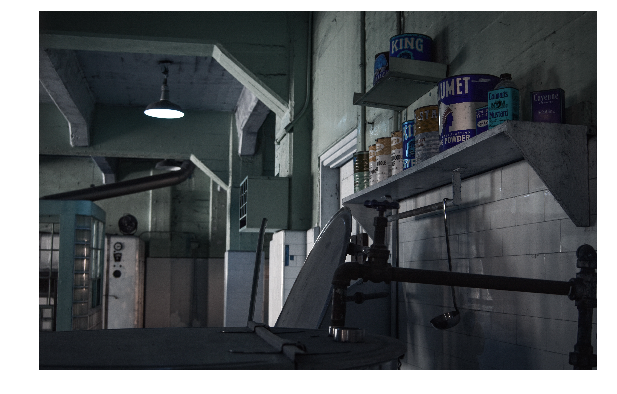

a room with a lot of different types of machines


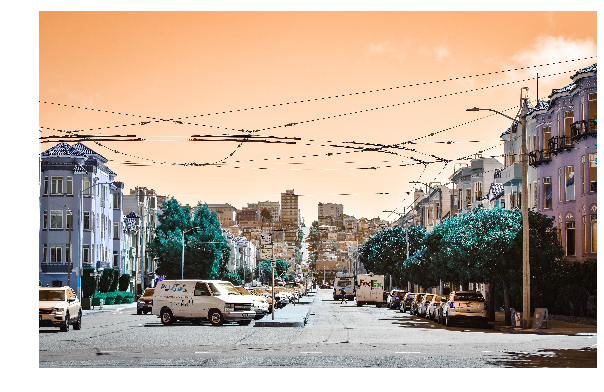

a busy street with a lot of traffic


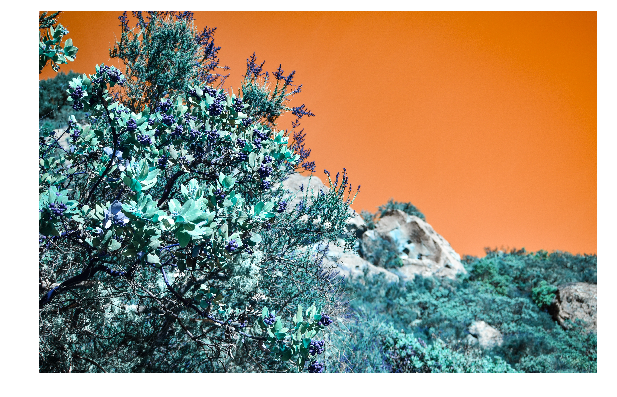

a tree with a branch and a tree in the background


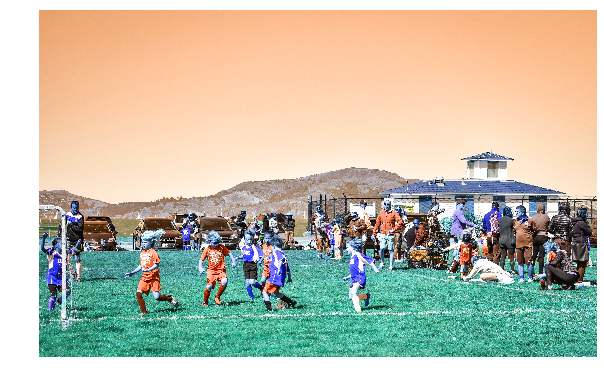

a group of people standing on top of a lush green field


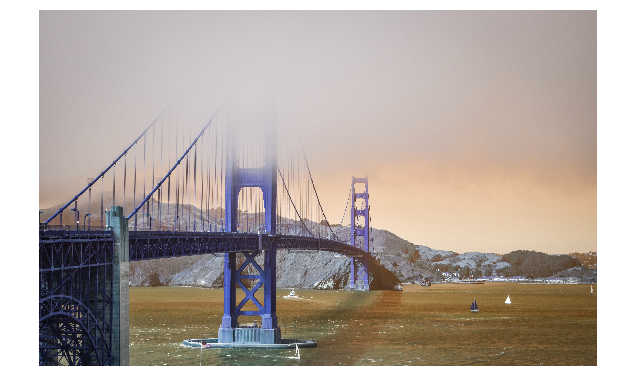

a large bridge over a river with a large tower in the background


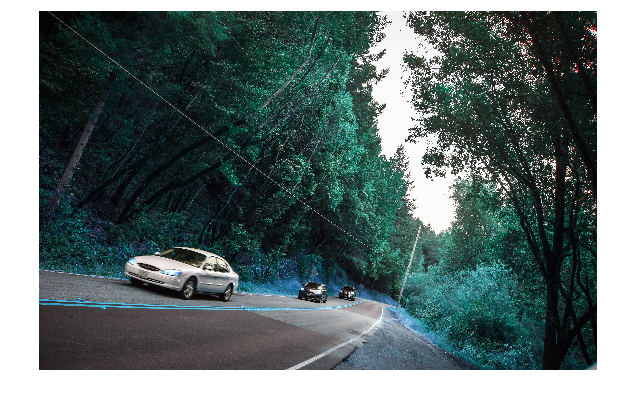

a car parked on the side of a road


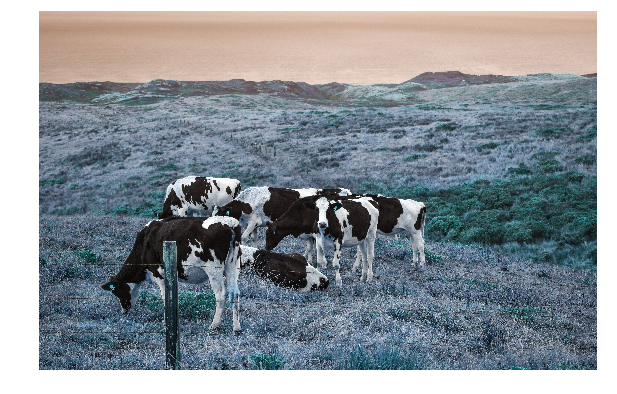

a group of cows standing in a field


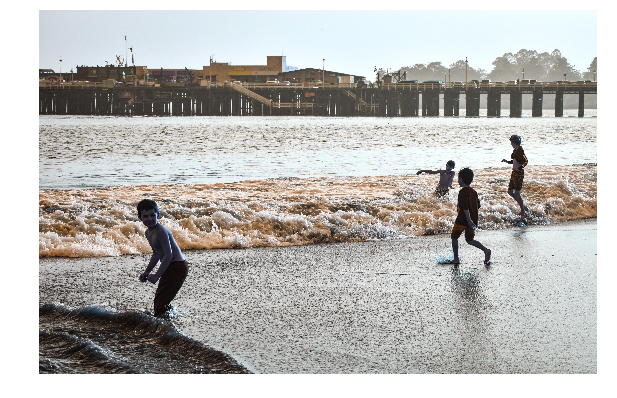

a group of people standing on top of a sandy beach


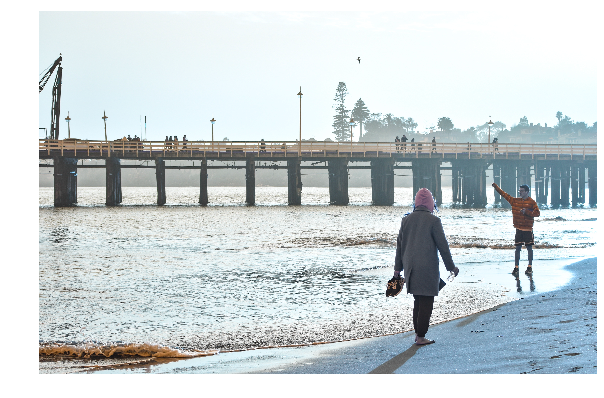

two people are walking across the beach with surfboards


In [6]:
test_img_dir = DATASET_DIR + "test_images/"

random_image_paths = random.sample(get_all_files_from_dir(test_img_dir), 10)

for file in random_image_paths:
  model.inference(cv2.imread(file))